# SVM Regression

In [13]:
import pandas as pd
import os
import numpy as np

In [5]:
os.chdir(r'C:\Users\fatem\Downloads\housekeeping_genes')

In [43]:
df = pd.read_excel('HouseKeeping genes-Trends in Genetics 29, (2013).xlsx')
df
df.dropna(inplace = True,axis = 'rows')
np.sum(pd.isna(df))
df['avg_ctl'] = (df['CT-B1'] + df['CT-Z1'])/2
df

,Genes,CT-B1,CT-Z1,FERSHTEH-ABDI,MOH-JAF-NORM,MOH-JAF-WART,avg_ctl
0,AAAS,33.456929,31.594090,52.17486,30.393560,22.836775,32.525510
1,AAGAB,38.941788,33.185432,42.62874,49.392114,58.597489,36.063610
2,AAMP,124.793669,95.216369,140.61010,126.100522,116.538709,110.005019
3,AAR2,45.944214,41.735951,51.55188,42.470841,29.212764,43.840083
4,AARS,85.398004,76.618349,86.18215,63.341667,74.176160,81.008176
...,...,...,...,...,...,...,...
3798,ZSWIM7,17.281256,18.832450,10.81801,22.935337,13.519682,18.056853
3799,ZSWIM8,82.460735,80.166356,57.40640,54.596319,48.392118,81.313546
3800,ZW10,43.173211,41.933661,43.55645,53.338094,56.694599,42.553436
3801,ZXDA,16.207812,22.325806,16.95446,13.350525,6.455086,19.266809


In [44]:
data = df.values

In [47]:
x = data[:,-1].reshape((-1,1))
y = data[:,3]

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVR    #for linear regression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVR   #for polynomial regression

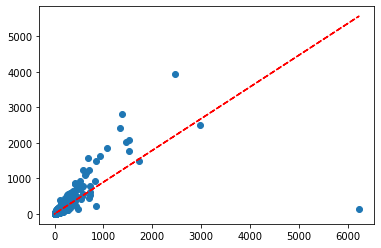

In [54]:
svm_reg = Pipeline([('scaler',StandardScaler()),('linear_svm',LinearSVR(epsilon = 1.5))])
svm_reg.fit(x,y)
y_svm_linear = svm_reg.predict(x)
plt.plot(x,y_svm_linear,'r--')
plt.scatter(x,y)

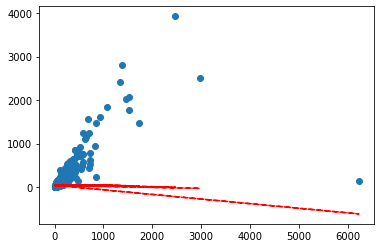

In [62]:
svm_poly_reg = Pipeline([('scaler',StandardScaler()),('linear_svm',SVR(kernel = 'poly', degree = 2,epsilon = 0.1, C =100))])
svm_poly_reg.fit(x,y)
y_svm_poly = svm_poly_reg.predict(x)
plt.plot(x,y_svm_poly,'r--')
plt.scatter(x,y)